**1. Data Gathering:**


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FjTdN0yZIrGKajIYNUHD")
project = rf.workspace("alex-eagles-2").project("suas-shape-detection-2")
version = project.version(2)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset = version.download("yolov12")

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
# Loading the model from the downloaded dataset directory with yolov8 as ultralytics latest official repo is YOLOv8
model = YOLO("yolov8n.pt")

In [ ]:
data_loc=dataset.location

In [ ]:
#Training the model
results = model.train(data=f"{data_loc}/data.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/suas-shape-detection-2-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [ ]:
model.val() #Model evaluation

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1607.8±721.4 MB/s, size: 171.9 KB)
val: Scanning /content/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5000/5000 4.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 313/313 0.4it/s 13:27
                   all       5000      36335      0.634      0.474      0.521      0.371
                person       2693      10777      0.755      0.671      0.745      0.514
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.649      0.514      0.562      0.365
            motorcycle        159        367      0.715       0.58      0.659      0.414
              airplane         97       

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c930d8080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024

In [ ]:
#verifying the pre existing split
import os
data_loc = dataset.location
train_dir = os.path.join(data_loc, 'train', 'images')
val_dir = os.path.join(data_loc, 'valid', 'images')
test_dir = os.path.join(data_loc, 'test', 'images')

print("Number of training images:", len(os.listdir(train_dir)))
print("Number of validation images:", len(os.listdir(val_dir)))
print("Number of testing images:", len(os.listdir(test_dir)))
print(f"Total: {len(os.listdir(train_dir)) + len(os.listdir(val_dir)) + len(os.listdir(test_dir))} (meets 1000+ requirement)")


Number of training images: 6399
Number of validation images: 700
Number of testing images: 101
Total: 7200 (meets 1000+ requirement)


In [ ]:
!pip install easyocr opencv-python-headless numpy
import cv2
import numpy as np
import easyocr
import torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 17.5 MB/s eta 0:00:00


Data Localization

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_detections(img_path, results, model, show_coords=False):

    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    ax = plt.gca()

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()   # [xmin, ymin, xmax, ymax]
        confs = r.boxes.conf.cpu().numpy()
        clss  = r.boxes.cls.cpu().numpy()

        for (xmin, ymin, xmax, ymax), conf, cls_id in zip(boxes, confs, clss):
            # Draw rectangle
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

            # Label
            cls_name = model.names[int(cls_id)]
            label = f"{cls_name} ({conf:.2f})"

            if show_coords:
                # Compute center pixel
                x_pixel = (xmin + xmax) / 2
                y_pixel = (ymin + ymax) / 2
                # Convert to meters
                X, Y = pixel_to_meter(x_pixel, y_pixel)
                label += f"\nX={X:.2f}m, Y={Y:.2f}m"

            # Add text
            plt.text(xmin, ymin - 5, label, color="yellow",
                     fontsize=9, backgroundcolor="black")

    plt.axis("off")
    plt.show()

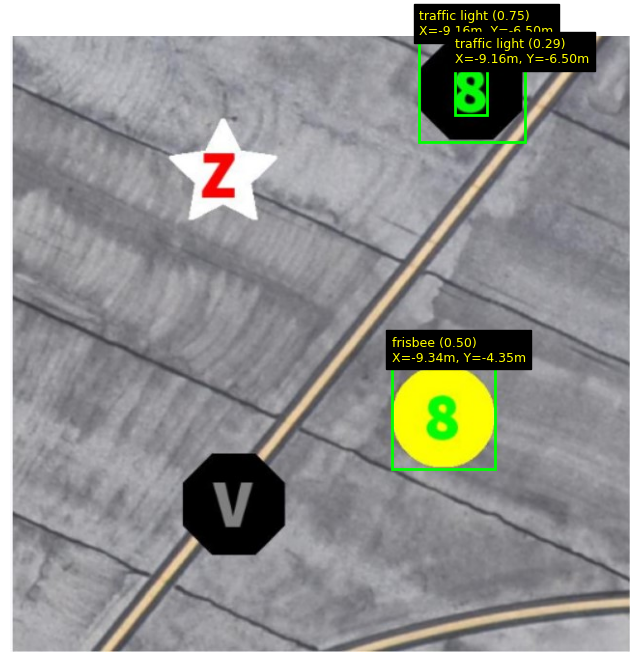

In [ ]:
show_detections("test_image.jpg", results, model, show_coords=True)

In [ ]:
import yaml
import os

yaml_path = os.path.join(data_loc, "data.yaml")

with open(yaml_path, "r") as f:
    yaml_data = yaml.safe_load(f)

print(f"Number of classes: {yaml_data['nc']}")
print("Class names:", yaml_data['names'])

Number of classes: 8
Class names: ['circle', 'cross', 'pentagon', 'quarter circle', 'rectangle', 'semicircle', 'star', 'triangle']


In [ ]:
# validating and log metrics
metrics = model.val(data="/content/suas-shape-detection-2-2/data.yaml", split='val')
print(f"mAP@50: {metrics.box.map50:.3f}")
print(f"Precision: {metrics.box.p.mean():.3f}")
print(f"Recall: {metrics.box.r.mean():.3f}")

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 766.9±469.0 MB/s, size: 56.4 KB)
val: Scanning /content/suas-shape-detection-2-2/valid/labels.cache... 700 images, 179 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 700/700 754.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 44/44 0.3it/s 2:39
                   all        700       1959    0.00958     0.0344    0.00534      0.003
                person        186        264     0.0129      0.159    0.00759    0.00442
               bicycle        184        250          0          0          0          0
                   car        189        276      0.022     0.0362     0.0128    0.00754
            motorcycle        173        251          0          0          0          0
              airplane        220        297     0.0272     0.0673     0.0149     0.0108
                   bus       